<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Neuronale Netze - Keras Regression - Diamonds
</b></font> </br></p>

---


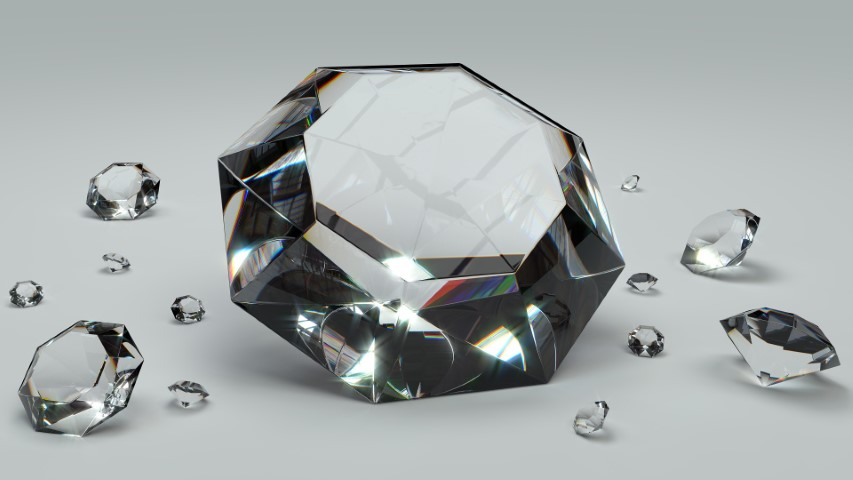

Bild von <a href="https://pixabay.com/de/users/colin00b-346653/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Colin Behrens</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---

Dieser klassische Datensatz enthält die Preise und andere Attribute von fast 54.000 Diamanten.



[DataSet](https://www.openml.org/search?type=data&status=active&id=42225)

[Info](https://www.kaggle.com/datasets/shivam2503/diamonds)


In [2]:
data_id = 42225
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', target_column='price', data_id=data_id)

In [3]:
target = df.target.copy()
data = df.data.copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
data.groupby('cut').count()

,carat,color,clarity,depth,table,x,y,z
cut,,,,,,,,
Very Good,12082,12082,12082,12082,12082,12082,12082,12082
Fair,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791


In [7]:
data.groupby('color').count()

,carat,cut,clarity,depth,table,x,y,z
color,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808


<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Plotly
</font></p>

In [8]:
import plotly.express as px
import plotly.subplots as sp

In [9]:
title_ = 'Depth'
b1 = px.box(data['depth'], title=title_, width=600, height=600)

title_ = 'Carat'
b2 = px.box(data['carat'], title=title_, width=600, height=600)

title_ = 'Table'
b3 = px.box(data['table'], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Depth', 'Carat', 'Table'))

for trace in b1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in b2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in b3.data:
    fig.add_trace(trace, row=1, col=3)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Box-Plots')

# Plot anzeigen
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [10]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Duplikate ermitteln
</font></p>

In [11]:
duplicates = df.frame[df.frame.duplicated()]
print("Anzahl Duplicate: ", len(duplicates))
# print("Duplizierte Einträge:")
# print(duplicates)

Anzahl Duplicate:  146


<p><font color='black' size="5">
Codierung
</font></p>

In [12]:
from sklearn.preprocessing import OrdinalEncoder
cat_seq = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],['J', 'I', 'H', 'G', 'F', 'E', 'D'], ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
data[cat_col] = OrdinalEncoder(categories=cat_seq).fit_transform(data[cat_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [13]:
from sklearn.preprocessing import MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>


<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [35]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)


<p><font color='black' size="5">
Modellierung des Netzwerkes
</font></p>

<p><font color='black' size="4">
Import der Module
</font></p>

In [36]:
from keras.layers import Input, Dense
from keras.models import Sequential

<p><font color='black' size="4">
Schichtweiser Aufbau des Netzwerks
</font></p>

In [37]:
model = Sequential()
model.add(Input(shape=(9,)))
model.add(Dense(units=88, activation='relu'))
model.add(Dense(units=44, activation='relu'))
model.add(Dense(units=11, activation='relu'))
model.add(Dense(1))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 88)                880       
                                                                 
 dense_6 (Dense)             (None, 44)                3916      
                                                                 
 dense_7 (Dense)             (None, 11)                495       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 5303 (20.71 KB)
Trainable params: 5303 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



<p><font color='black' size="4">
Modell compilieren
</font></p>

In [39]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

In [40]:
from tensorflow import keras
import tensorflow as tf
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=[tf.keras.losses.MeanAbsoluteError()])

In [41]:
model.fit(data_train, target_train, epochs=20)

Epoch 1/20
1180/1180 [==============================] - 2s 2ms/step - loss: 15861281.0000 - mean_absolute_error: 2885.1228
Epoch 2/20
1180/1180 [==============================] - 5s 4ms/step - loss: 4887615.0000 - mean_absolute_error: 1494.7067
Epoch 3/20
1180/1180 [==============================] - 4s 3ms/step - loss: 1279410.2500 - mean_absolute_error: 727.7571
Epoch 4/20
1180/1180 [==============================] - 4s 3ms/step - loss: 992132.6875 - mean_absolute_error: 626.7840
Epoch 5/20
1180/1180 [==============================] - 2s 2ms/step - loss: 888665.0625 - mean_absolute_error: 563.7837
Epoch 6/20
1180/1180 [==============================] - 5s 5ms/step - loss: 833306.3750 - mean_absolute_error: 516.1486
Epoch 7/20
1180/1180 [==============================] - 3s 2ms/step - loss: 792938.7500 - mean_absolute_error: 490.5800
Epoch 8/20
1180/1180 [==============================] - 4s 3ms/step - loss: 768376.4375 - mean_absolute_error: 479.2798
Epoch 9/20
1180/1180 [============

In [42]:
print(model.history.params)
print(model.history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 1180}
dict_keys(['loss', 'mean_absolute_error'])


<p><font color='black' size="5">
Loss-Entwickung
</font></p>

In [43]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=model.history.history['loss'], title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>


<p><font color='black' size="5">
Prediction
</font></p>


In [44]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

506/506 [==============================] - 3s 5ms/step


<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2:5.2f}' )

Modell: <keras.src.engine.sequential.Sequential object at 0x7f4f79d99600> -- Train --- Bestimmtheitsmass:  0.97


In [46]:
r2 = r2_score(target_test, target_test_pred)
print(f'Modell: {model} -- Test --- Bestimmtheitsmass: {r2:5.2f}' )

Modell: <keras.src.engine.sequential.Sequential object at 0x7f4f79d99600> -- Test --- Bestimmtheitsmass:  0.97


<p><font color='black' size="5">
Mean Absolut Error
</font></p>

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(target_test, target_test_pred)
print(f'Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}' )

Modell: <keras.src.engine.sequential.Sequential object at 0x7f4f852aa980> -- Test -- Mean Absolute Error: 396.84


<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [27]:
# Übernahme der Testdaten
cube = pd.DataFrame(data_test.copy())
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(data_test)
pca_df = pd.DataFrame(pca)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [28]:
import plotly.express as px
import plotly.subplots as sp

In [29]:
# Boxplot
title_ = 'Boxplot real vs predict'
px.box(cube[['real', 'predict']], title=title_, width=600, height=600)

In [30]:
# Histogramm
title_ = 'Histogramm Prices real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=10, text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)
fig.show()

In [31]:
# 2 x Scatterplots
title_ = 'Streupunktdiagramm real'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real', title=title_, width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict', title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Vergleich real vs predict')

# Plot anzeigen
fig.show()

<p><font color='black' size="5">
Fehlerhafte Vorhersagen
</font></p>

In [32]:
cube['abs_Abw%'] = abs((cube['real'] - cube['predict']) / cube['real'] *100)
cube.head(10).style.format("{:,.1f}")

,index,carat,cut,color,clarity,depth,table,x,y,z,real,predict,PCA1,PCA2,abs_Abw%
0,"1,388.0",0.0,4.0,3.0,6.0,0.5,0.3,0.4,0.1,0.1,559.0,620.7,1.7,2.7,11.0
1,"50,052.0",0.1,2.0,4.0,5.0,0.5,0.3,0.5,0.1,0.1,"2,201.0","2,281.8",0.2,1.8,3.7
2,"41,645.0",0.0,4.0,5.0,5.0,0.5,0.2,0.4,0.1,0.1,"1,238.0","1,324.4",-0.5,2.6,7.0
3,"42,377.0",0.0,3.0,5.0,5.0,0.5,0.3,0.5,0.1,0.1,"1,304.0","1,442.5",-0.6,2.4,10.6
4,"17,244.0",0.3,4.0,5.0,1.0,0.5,0.2,0.7,0.1,0.1,"6,901.0","10,432.8",-2.2,-0.9,51.2
5,"1,608.0",0.2,0.0,5.0,1.0,0.3,0.4,0.6,0.1,0.1,"3,011.0","3,685.0",-2.5,-1.7,22.4
6,"46,398.0",0.1,4.0,4.0,4.0,0.5,0.3,0.5,0.1,0.1,"1,765.0","1,673.2",-0.1,1.3,5.2
7,"45,493.0",0.1,4.0,6.0,3.0,0.5,0.3,0.5,0.1,0.1,"1,679.0","1,800.0",-2.3,1.3,7.2
8,"49,385.0",0.1,3.0,5.0,3.0,0.5,0.3,0.5,0.1,0.1,"2,102.0","2,355.7",-1.5,0.7,12.1
9,"10,460.0",0.2,4.0,2.0,2.0,0.5,0.3,0.6,0.1,0.1,"4,789.0","5,623.8",0.9,-1.3,17.4


In [33]:
cube.describe().T

,count,mean,std,min,25%,50%,75%,max
index,16182.0,2.684652e+04,15590.947396,1.000000,13290.750000,26962.000000,40279.750000,53936.000000
carat,16182.0,1.234274e-01,0.097791,0.000000,0.041580,0.103950,0.174636,0.792100
cut,16182.0,2.904833e+00,1.119779,0.000000,2.000000,3.000000,4.000000,4.000000
color,16182.0,3.408973e+00,1.702875,0.000000,2.000000,3.000000,5.000000,6.000000
clarity,16182.0,3.051106e+00,1.652282,0.000000,2.000000,3.000000,4.000000,7.000000
depth,16182.0,5.211073e-01,0.040052,0.000000,0.502778,0.525000,0.541667,1.000000
table,16182.0,2.778458e-01,0.043322,0.115385,0.250000,0.269231,0.307692,0.576923
x,16182.0,5.327106e-01,0.104335,0.000000,0.437616,0.529795,0.608007,0.944134
y,16182.0,9.719006e-02,0.019212,0.000000,0.079966,0.096944,0.110866,0.539898
z,16182.0,1.111035e-01,0.021764,0.000000,0.091195,0.110692,0.126730,0.198428


In [34]:
# Histogramm
title_ = 'Histogramm absolute Abweichung'
fig = px.histogram(cube, x=['abs_Abw%'], nbins=20, text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)
fig.show()

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>